<a href="https://colab.research.google.com/github/ngonhan2k5/cs-ml/blob/master/proj1/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare dataset
Follow the steps:


1.   Load data
2.   Clean up data
3.   LabelEncoder the categorical features to numeric
4.   Remove the unneccessary features
5.   Separate the data into input (X) and target (y)
6.   Split the data (X,y) into Train set, Test set


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**1.1. Load data**

In [19]:
#load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#df.describe()
df.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
15183,38,State-gov,272944,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
839,17,Private,198124,11th,7,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
24892,21,Private,355287,9th,5,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,48,Mexico,<=50K
7445,33,Private,180551,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K


**1.2 Clean up data**

As analyzed in the EDA, I remove the records missing values

In [20]:
#remove records missing values
no_missing_df= df.drop(df[df.native_country.isnull()].index)
no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.workclass.isnull()].index)
no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.occupation.isnull()].index)
no_missing_df.isnull().sum().max() #just checking that there's no missing data missing...

0

**1.3. LabelEncoder the categorical features to numeric**

Decision Tree requires numeric features. So, I transform the categorical features into numeric by using LabelEncoder

In [25]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
no_missing_df['workclass_num']= le.fit_transform(no_missing_df['workclass'])
no_missing_df['marital_status_num']= le.fit_transform(no_missing_df['marital_status'])
no_missing_df['occupation_num']= le.fit_transform(no_missing_df['occupation'])
no_missing_df['relationship_num']= le.fit_transform(no_missing_df['relationship'])
no_missing_df['race_num']= le.fit_transform(no_missing_df['race'])
no_missing_df['sex_num']= le.fit_transform(no_missing_df['sex'])
no_missing_df['native_country_num']= le.fit_transform(no_missing_df['native_country'])
no_missing_df['income_num']= le.fit_transform(no_missing_df['income'])

#.columns

**1.4. Remove the unneccessary features**

*   Remove the categorical features because they are represented by the numeric ones
*   Remove the unrelated features indicated in the EDA



In [30]:
#remove the unnecessary features
neccessary_columns_df= no_missing_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])
#neccessary_columns_df.columns

**1.5. Separate the data into input (X) and target (y)**

In [32]:
#separate input and target
X= neccessary_columns_df.drop('income_num', axis='columns')
y= neccessary_columns_df['income_num']

**1.6. Split the data (X,y) into Train set, Test set**

Shuffle then split the data

In [33]:
#Shuffle and Split data into Training, Testing dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)
print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data :", X_test.shape, y_test.shape)
print('Train: {}% | Test {}%'.format(round(len(y_train)/len(target_df),2), round(len(y_test)/len(target_df),2)))

# X_intermediate, X_test, y_intermediate, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=1)
# X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate, y_intermediate, shuffle=False, test_size=0.25, random_state=1)
# del X_intermediate, y_intermediate

# print("Training Data:", X_train.shape, y_train.shape)
# print("Training Data:", X_validation.shape, y_validation.shape)
# print("Testing Data :", X_test.shape, y_test.shape)
# print('Train: {}% | Validation: {}% | Test {}%'.format(round(len(y_train)/len(target_df),2), round(len(y_validation)/len(target_df),2), round(len(y_test)/len(target_df),2)))

Training Data: (21112, 12) (21112,)
Testing Data : (9049, 12) (9049,)
Train: 0.7% | Test 0.3%


# 2. Training Model (Decision Tree Classifier)

Follow 2 steps to train the model
1.   Tune hyper-parameters to find the ones can build the best model
2.   Apply the best ones to train the Decision Tree Classifier model

Then I show the Confusion matrix, Precision, Recall and F1-score



**2.1. Tuning Hyper-Parameters to find the best ones**

Use **GridSearchCV** for tuning

In [34]:
from sklearn.model_selection import GridSearchCV
def get_the_GridSearcCV(model, param_dist, X, y):
  gs= GridSearchCV(model, param_dist)
  gs.fit(X, y)
  print('Tuning Hyper-Parameters:')
  print('  - The best parameters: ', gs.best_params_)
  print('  - The best score: ', gs.best_score_)
  return gs

In [35]:
#Tuning hyper-parameters by using GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_dist= {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5,6,7,8,9],
             'min_samples_leaf': [2,3,4],
             'min_samples_split': [4,5,6,7,8,9]
             }
gs= get_the_GridSearcCV(DecisionTreeClassifier(), param_dist,  X, y)

Tuning Hyper-Parameters:
  - The best parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 6}
  - The best score:  0.8520939265955899


**2.2. Apply the best hyper-parameters to train the model**

The best hyper-parameters:  {**'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8**}


In [39]:
best_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=9, min_samples_leaf=3, min_samples_split=8)
best_clf= best_clf.fit(X_train, y_train)
score= best_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.8498176594098795


**2.3. The confusion matrix**

Apply the trained model to predict the Test set

In [40]:
#predict Testing set
y_predict= best_clf.predict(X_test)

#Show confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
confusion_df= pd.DataFrame(cm)
print("Confussion Matrix when apply the best model to the Test data")
confusion_df

Confussion Matrix when apply the best model to the Test data


,0,1
0,6446,337
1,1022,1244


**2.4. Precision, Recall, F1-score**

In [41]:
# Precision, Recall, F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6783
           1       0.79      0.55      0.65      2266

    accuracy                           0.85      9049
   macro avg       0.82      0.75      0.78      9049
weighted avg       0.84      0.85      0.84      9049



*The result above shows that:*

*   *y=0:  precision= 0.87, f1-score= 0.9*
*   *y=1:  precision= 0.76, f1-score= 0.54*

*Why exists the gaps between those score?*

*We also see the support of y=0 is much higher than the support of y=1 about 3.15%.*

*   *y=0:  support= 6870*
*   *y=1:  support= 2176*

*Because y=0 has many support, it got trained and predicted better than y=1.*

# 3. Learning Curve and Validation Curve

I try 3 models with different hyper-parameters and draw the Learning Curve and Validation Curve for each model.


In [42]:
def show_curve(train_scores, test_scores, title):
  train_scores_mean= np.mean(train_scores, axis=1)
  train_scores_std= np.std(train_scores, axis=1)
  test_scores_mean= np.mean(test_scores, axis=1)
  test_scores_std= np.std(test_scores, axis=1)

  plt.plot(train_sizes, train_scores_mean, marker='o', label= "Training score")
  plt.plot(train_sizes, test_scores_mean, marker='o', label="Cross-Validation score")

  plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color= '#33F4FF',alpha=0.5)
  plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color= '#DDDDDD',alpha=0.5)

  plt.title(title)
  plt.xlabel('Training Size')
  plt.ylabel('Score')
  plt.legend(loc= 'best')

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
param_name= 'min_samples_split'
param_range = np.linspace(0.01,1,20)
train_sizes= np.linspace(0.01,1,20)
scoring= 'accuracy'

**1. The best model**

Hyper-parameters= {**'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8**}

In [44]:
score= best_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.8498176594098795


***1.1. Learning curve***

[learning_curve] Training set sizes: [  241  1498  2755  4012  5270  6527  7784  9041 10298 11556 12813 14070
 15327 16584 17842 19099 20356 21613 22870 24128]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


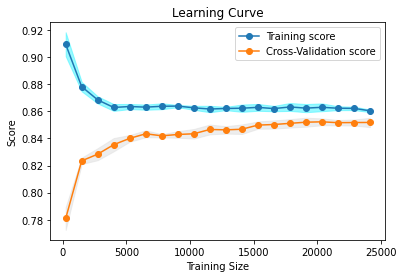

In [45]:
train_sizes, train_scores, test_scores= learning_curve(best_clf, X, y, scoring=scoring, train_sizes= train_sizes, verbose=1)
show_curve(train_scores, test_scores, 'Learning Curve')

The y-axis is '**score**', so the higher the score, the better the performance of the model.


*   Training score decreases gradually then be stable.
*   Cross-validation scoare increases gradually then be stable.
*   The gap between cross-validation score and training score is quite small.

The model is acceptable.


***1.2. Validation curve***

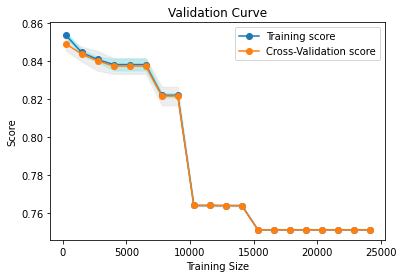

In [46]:
train_scores, test_scores= validation_curve(best_clf, X, y, param_name=param_name, param_range=param_range, scoring= scoring)
show_curve(train_scores, test_scores, 'Validation Curve')

**2. The second model**

Hyper-parameters= {**'criterion': 'gini', 'max_depth': 100**}

In [47]:
second_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=100)
second_clf= second_clf.fit(X_train, y_train)
score= second_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.804066747706929


***2.1. Learning curve***

[learning_curve] Training set sizes: [  241  1498  2755  4012  5270  6527  7784  9041 10298 11556 12813 14070
 15327 16584 17842 19099 20356 21613 22870 24128]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished


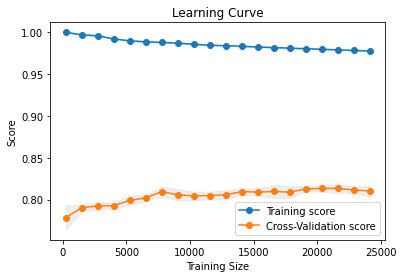

In [48]:
train_sizes, train_scores, test_scores= learning_curve(second_clf, X, y, scoring=scoring, train_sizes= train_sizes, verbose=1)
show_curve(train_scores, test_scores, 'Learning Curve')

The y-axis is '**score**', so the higher the score, the better the performance of the model.


*   Training score decreases over time.
*   Cross-validation scoare increases over time.
*   The gap between cross-validation score and training score is huge.

We should tune hyper-parameters to get the better score, the better model.


***2.2. Validation curve***

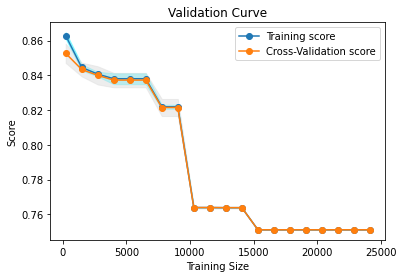

In [49]:
train_scores, test_scores= validation_curve(second_clf, X, y, param_name=param_name, param_range=param_range, scoring=scoring)
show_curve(train_scores, test_scores, 'Validation Curve')

**3. The third model**

Hyper-parameters= {**'criterion': 'entropy'**}

In [50]:
third_clf= DecisionTreeClassifier(criterion= 'entropy')
third_clf= third_clf.fit(X_train, y_train)
score= third_clf.score(X_test, y_test)
print("Test score: ", score)

Test score:  0.806276936678086


***3.1. Learning curve***

[learning_curve] Training set sizes: [  241  1498  2755  4012  5270  6527  7784  9041 10298 11556 12813 14070
 15327 16584 17842 19099 20356 21613 22870 24128]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


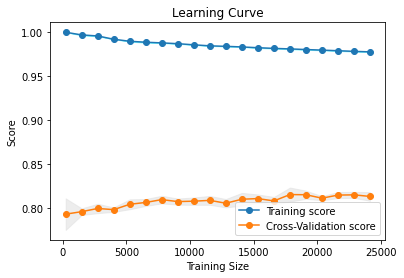

In [51]:
train_sizes, train_scores, test_scores= learning_curve(third_clf, X, y, scoring=scoring, train_sizes= train_sizes, verbose=1)
show_curve(train_scores, test_scores, 'Learning Curve')

The y-axis is '**score**', so the higher the score, the better the performance of the model.


*   Training score decreases over time.
*   Cross-validation scoare increases over time.
*   The gap between cross-validation score and training score is huge.

We should tune hyper-parameters to get the better score, the better model.


***3.2. Validation curve***

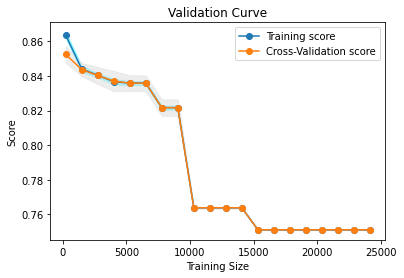

In [52]:
train_scores, test_scores= validation_curve(third_clf, X, y, param_name=param_name, param_range=param_range, scoring=scoring)
show_curve(train_scores, test_scores, 'Validation Curve')